<a href="https://colab.research.google.com/github/y4c6/master_thesis/blob/main/EJMR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

受夠自己亂七八糟的檔案，放過來整理。

# 這些變數名稱需要心情不錯的時候整理一次

# 套件

In [ ]:
from google.colab import drive
# directory
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import json

# 準備 dataset

# 合併json檔案

## 合併檔案 ( 從 EJMRpostXX.json 到 EJMRpost_XX_XX.json )

不是每次都要跑這個

In [ ]:
import glob
import json

def list_json_files(path, start_with): 
    # get a list of json files that starts with specific word 
    json_files = glob.glob(path + f'/{start_with}*.json')
    return json_files

def concat_json_files(file_paths):
    # concatenate the content of all the files in the list
    data = {'topic':[], 'posts':[]}
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            file_data = json.load(f)
            data['topic'].extend(file_data['topic'])
            data['posts'].extend(file_data['posts'])
    return data

def concat_json_files_with_start(path, start_with):
    json_files = list_json_files(path, start_with)
    data = concat_json_files(json_files)
    return data

In [ ]:
path = '/content/gdrive/MyDrive/論文相關材料/'
start_with = 'EJMRpost_'

data = concat_json_files_with_start(path, start_with)

In [ ]:
## 確認合併成功
len(data['topic'])

293840

下面跟上面的好像可以做到一樣的事情

## 合併檔案 ( 從 EJMRpost_XX_XX.json 到 data: dict )

In [ ]:
with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_1_10.json', 'r') as f:
    file1 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_11_20.json', 'r') as f:
    file2 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_21_30.json', 'r') as f:
    file3 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_31_44.json', 'r') as f:
    file4 = json.load(f)

In [ ]:
def concat_json_files(files: list):
    # concatenate the file in the lists
    data = {'topic':[], 'posts':[]}
    for file in files:
      data['topic'].extend(file['topic'])
      data['posts'].extend(file['posts'])
    return data

In [ ]:
data = concat_json_files([file1, file2, file3, file4])

In [ ]:
## 確認合併成功
len(data['topic'])

293840

# 將檔案轉成表格 (從 data: dict 到 df: pd.df)

In [ ]:
df = pd.DataFrame(data)
df.head(3)

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...


### check duplicated value

In [ ]:
df[df.topic.duplicated()==True]

,topic,posts
11960,https://www.econjobrumors.com/topic/im-studyin...,[black Americans during the pandemic on Asian ...
20387,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
20680,https://www.econjobrumors.com/topic/why-do-so-...,[https://haas.berkeley.edu/phd/careers/job-pla...
24228,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
31255,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
...,...,...
290253,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
292904,https://www.econjobrumors.com/topic/usa-fact-o...,[Poverty is higher among Appalachians than the...
293479,https://www.econjobrumors.com/topic/america-fa...,[That is pretty bad. Those are levels not diff...
293593,https://www.econjobrumors.com/topic/china-fact...,"[Wow. That just blew my mind., well done!!, Ar..."


I have 1,192 duplicated rows in this data.
maybe there are something wrong when i scraped,
but the number is not too big related to the total nubmber of dataset (293,840).
I think it would be okay to remove them here.

In [ ]:
df = df.drop_duplicates(subset=['topic'], keep="first")

df.head()

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...
3,https://www.econjobrumors.com/topic/just-found...,[Why? Why would you ever study such a thing?]
4,https://www.econjobrumors.com/topic/karen-and-...,"[What happens next?, Mutant babies., Zhang pos..."


In [ ]:
df.shape

(292648, 2)

# 準備 y, X

## 準備 y ( 利用condition()挑出 df.topic 中包含 關鍵字 的 df.posts(列) )

### 準備 df.Target ( asia+china -> china -> asia)

In [ ]:
asia_target = ['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang', 'china', 'chinese']
africa_target = ['africa', 'african', 'black']

In [ ]:
both_target = asia_target + africa_target
print(both_target)

['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang', 'china', 'chinese', 'africa', 'african', 'black']


In [ ]:
#asia_target = ['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']
#china_target = ['china', 'chinese']
#both_target = asia_target + africa_target
#print(both_target)

In [ ]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asia_target) and any( word in x for word in africa_target): #series.str.contains('Mel').any()
        return "both"
    elif any( word in x for word in asia_target):
        return "asia"
    elif any( word in x for word in africa_target):
        return "africa"
    else:
        return "other"
 
# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asia


### 準備 df.y

In [ ]:
df = df.drop(df[df['Target'] == 'other'].index)
df.head(3)

,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asia
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",asia


In [ ]:
df.groupby('Target').size()

Target
africa    1703
asia      7882
both        85
dtype: int64

? africa <<<<< asia
? Both 要怎麼處理比較好?

In [ ]:
df['y'] = df['Target'].apply(lambda x: 1 if x == 'asia' else 0)
df.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asia,1
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",asia,1


### y的視覺化 

<Axes: title={'center': 'Ratio of labels'}, ylabel='Target'>

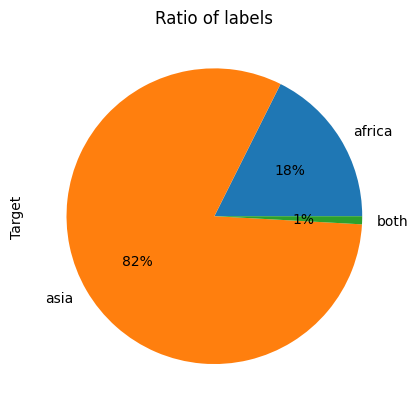

In [ ]:
df.groupby('Target').size().plot(kind = 'pie',
                subplots = False,
                ylabel = 'Target',
                autopct = '%1.0f%%',
                title = 'Ratio of labels')

畫每個主題的文章數量barplot

In [ ]:
posts_len = []

for index, row in df.iterrows():
    posts_len.append( len(row['posts']) )

len(posts_len) 

292648

In [ ]:
max(posts_len)

10842

In [ ]:
posts_len.count(0)

3286

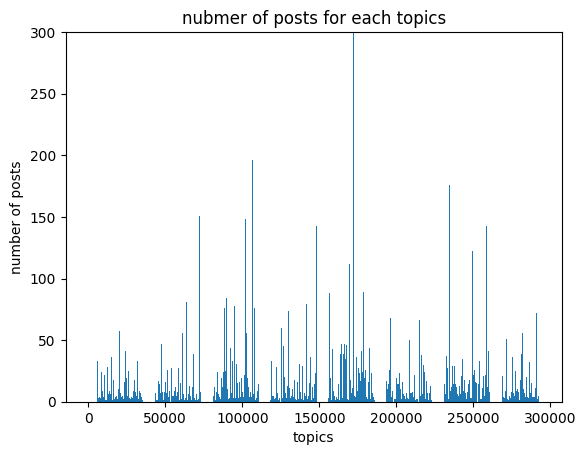

In [ ]:
import matplotlib.pyplot as plt
# ram is quite dangerous at this step

plt.bar(np.arange(len(posts_len))+1 , posts_len)
plt.ylim((0,300))
plt.xlabel('topics')
plt.ylabel('number of posts')
plt.title('nubmer of posts for each topics')
plt.show()

## 準備 X (做 NLP 前處理， Stemming/Lemmatization)

In [ ]:
import nltk
nltk.download('punkt') #this is download for tonkenizer
nltk.download('wordnet')  # this is download for lemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')  # this is download for lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# 寫 Preprocessor 的 params functions

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text
def preprocess_text(text):
  # Lowercase all characters
  text = text.lower()

  # Remove non-English sentences
  pattern = re.compile(r'[^\x00-\x7F]+')
  text = re.sub(pattern, '', text)

  # Remove URLs
  text = re.sub(r'https?://\S+', '', text)

  # Remove digits
  text = text.translate(str.maketrans('', '', string.digits))

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  return text


# Define a function to tokenize and remove stopwords from text and stemmer
def stemmer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Stem the tokens
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  return tokens


# Define a function to tokenize and remove stopwords from text and lemmatize
def lemmatizer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  return tokens


In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Some of posts are non-eng, they didnt be counted in when tokenizing, which make some of tokens are `[]`. so the step of removal is needed.

In [ ]:
## the input type
df['stemmed_tokenized'] = df['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
df['lemmatized_tokenized'] = df['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
df = df[df['lemmatized_tokenized'].str.len() != 0]
print(df.shape)
df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(9413, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


In [ ]:
df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_tokens.pkl")

In [ ]:
df = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_tokens.pkl")
df.shape

(9413, 3)

## Word2Vec (和 目標字 有關的w2v)

In [ ]:
from gensim.models import Word2Vec

## setting
vector_size = 100
window = 5
min_count = 1
training_epochs = 20

In [ ]:
gensim.__version__

'4.3.1'

In [ ]:
corpus_lemmatized = df['lemmatized_tokenized'].values
corpus_stemmed = df['stemmed_tokenized'].values

In [ ]:
topn = 5

In [ ]:
## model
word2vec_lemmatized = Word2Vec(sentences=corpus_lemmatized, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_lemmatized.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']))
  print('-------')

asian
             Word      Sims
0        nonwhite  0.564990
1  asianamericans  0.547366
2   asianamerican  0.519537
3   discriminated  0.518219
4        nonasian  0.506039
-------
asia
        Word      Sims
0  turkistan  0.618652
1    asiaand  0.562039
2  turkestan  0.553324
3  southeast  0.547117
4    asiahow  0.528457
-------
korea
                     Word      Sims
0  americaeuropeaustralia  0.663579
1               ermbanned  0.631815
2                  nhanes  0.629189
3                   ogden  0.623344
4                    racm  0.617890
-------
korean
         Word      Sims
0       korea  0.567076
1  vietnamese  0.497037
2    japanese  0.491245
3   ermbanned  0.465802
4      nhanes  0.464527
-------
japan
         Word      Sims
0    japanese  0.532427
1  japansouth  0.525587
2      sweden  0.478591
3      skorea  0.469361
4     betabux  0.467673
-------
japanese
        Word      Sims
0      japan  0.532427
1     german  0.505508
2      dalit  0.494612
3     korean  0.491

In [ ]:
## model
word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 
#, window=window_size, min_count=min_count, epochs=training_epochs)

# Because the corpus are stemmed, so my key  words also need to be stemmed
stemmer = PorterStemmer()

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_stemmed.wv.most_similar( stemmer.stem(word), topn=topn), columns=['Word', 'Sims']))
  print('-------')

asian
            Word      Sims
0  asianamerican  0.659704
1       nonasian  0.606992
2          white  0.558297
3        nonwhit  0.556352
4            azn  0.536284
-------
asia
          Word      Sims
0    turkistan  0.672400
1    turkestan  0.585749
2      asiaand  0.577455
3  taiwanjapan  0.566487
4      asiahow  0.554155
-------
korea
          Word      Sims
0  asiansmalay  0.609907
1      adelaid  0.607884
2        afrai  0.595645
3        ogden  0.590998
4       imgrat  0.590620
-------
korean
        Word      Sims
0      korea  0.560745
1    japanes  0.555944
2      nhane  0.504144
3  vietnames  0.487746
4    hamnida  0.463572
-------
japan
         Word      Sims
0  japansouth  0.581710
1     japanes  0.540394
2     germani  0.505923
3          sk  0.487356
4         jpn  0.483717
-------
japanese
      Word      Sims
0   korean  0.555944
1    japan  0.540393
2   german  0.515413
3   chines  0.484724
4  meancom  0.480075
-------
taiwan
       Word      Sims
0     china  0

## 得到經過 CountVectorizer 的 BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

## 將 目標字 移出 BOW

In [ ]:
# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (asia_target + africa_target)]

# Applying the conditions
df['lemmatized_cleaned'] = df['lemmatized_tokenized'].apply(remove_target)
df['stemmed_cleaned'] = df['stemmed_tokenized'].apply(remove_target)
df.head(3)

,topic,posts,Target,y,stemmed_tokenized,lemmatized_tokenized,lemmatized_cleaned,stemmed_cleaned
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asia,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina...","[genius, outcome, west, looking, russian, fina...","[geniu, outcom, west, look, russian, financ, t..."
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer...","[even, accounting, indian, quant, club, univer...","[even, account, indian, quant, club, univers, ..."
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",asia,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]","[never, forget, never, forgive]","[never, forget, never, forgiv]"


## 得到 lemmatized 或 stemmed 的 X

In [ ]:
import scipy.sparse

In [ ]:
lemmatized_matrix = vectorizer.fit_transform(df['lemmatized_cleaned'])

# Print the matrix
print(lemmatized_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(lemmatized_matrix.toarray().shape)

(9413, 10000)


In [ ]:
scipy.sparse.save_npz('/content/gdrive/MyDrive/Thesis_Data&Result/lemmatized_matrix.npz', lemmatized_matrix)

scipy.sparse._csr.csr_matrix

In [ ]:
lemmatized_matrix = scipy.sparse.load_npz('/content/gdrive/MyDrive/Thesis_Data&Result/lemmatized_matrix.npz')
type(lemmatized_matrix)

In [ ]:
stemmed_matrix = vectorizer.fit_transform(df['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(stemmed_matrix.toarray().shape)

(6657, 10000)


In [ ]:
scipy.sparse.save_npz('/content/gdrive/MyDrive/Thesis_Data&Result/stemmed_matrix.npz', stemmed_matrix)

In [ ]:
stemmed_matrix = scipy.sparse.load_npz('/content/gdrive/MyDrive/Thesis_Data&Result/stemmed_matrix.npz')
type(stemmed_matrix)

df.Target.shape = 6657

### concat y and X into dataframe

### lemma

In [ ]:
data_lemma = pd.concat([df.y, pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())], ignore_index=True, sort=False)
data_lemma.rename(columns={0: 'y'}, inplace=True)
data_lemma = data_lemma.fillna(0)
data_lemma.head(3)

,y,aa,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoo,zoom,zoomer,zou,zu,zuckerberg,zuel,zulu,zuma,zurich
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma.pkl")

In [ ]:
data_lemma = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma.pkl")
data_lemma.head()

### stem

In [ ]:
data_stem = pd.concat([df.y, pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())], ignore_index=True, sort=False)
data_stem.rename(columns={0: 'y'}, inplace=True)
data_stem = data_stem.fillna(0)
data_stem.head(3)

,y,aa,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoo,zoom,zoomer,zou,zu,zuckerberg,zuel,zulu,zuma,zurich
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem.pkl")

In [ ]:
data_stem = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem.pkl")
data_stem.head()

# 真正要跑的部分

說點什麼

### Training set and Testing set 

In [ ]:
from sklearn.model_selection import train_test_split

# train, test = train_test_split(df, test_size=0.3, random_state=416)

In [ ]:
train_lemma, test_lemma = train_test_split(data_lemma, test_size=0.3, random_state=416)

In [ ]:
print('Shape of training set: ', train_lemma.shape)
print('Shape of testing set: ', test_lemma.shape)

Shape of training set:  (13178, 10001)
Shape of testing set:  (5648, 10001)


In [ ]:
train_stem, test_stem = train_test_split(data_stem, test_size=0.3, random_state=416)

In [ ]:
print('Shape of training set: ', train_stem.shape)
print('Shape of testing set: ', test_stem.shape)

Shape of training set:  (13178, 10001)
Shape of testing set:  (5648, 10001)


## 先跑一次 Lasso，將非零的字詞當作 DoubleML 中的 Treatment

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV()
clf.fit(train_lemma.loc[:, train_lemma.columns != 'y'], train_lemma['y'])
print(clf.coef_[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.12815500143779, tolerance: 0.255060946689432
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5983134716448149, tolerance: 0.255060946689432
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.286739126629527, tolerance: 0.255060946689432
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWar

[-0. -0. -0. -0.  0. -0. -0. -0. -0.  0.]


In [ ]:
lemmatized_lasso_coef = clf.coef_

print(len(clf.coef_[clf.coef_!=0]))

138


In [ ]:
lemmatized_D = data_lemma.keys()[1:][clf.coef_!=0] # remove y
print(lemmatized_D)

Index(['acquaint', 'advertis', 'amsterdam', 'angwang', 'aspi', 'barrier',
       'basement', 'battl', 'bind', 'blk',
       ...
       'wellknown', 'width', 'wmen', 'wooden', 'worst', 'wrongpoorli', 'wwi',
       'york', 'yu', 'zhina'],
      dtype='object', length=138)


In [ ]:
np.save('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_FS_lemmatized_D', lemmatized_D)

### stem

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV()
clf.fit(train_stem.loc[:, train_stem.columns != 'y'], train_stem['y'])
print(clf.coef_[:10])

[-0. -0.  0.  0. -0. -0. -0.  0. -0. -0.]


In [ ]:
stemmed_lasso_coef = clf.coef_

print(len(clf.coef_[clf.coef_!=0]))

97


In [ ]:
stemmed_D = vectorizer.get_feature_names_out()[clf.coef_!=0]

print(stemmed_D)

## 跑 DoubleML (根據上面得到的 Treatment 和 Control)

In [ ]:
!pip install -U DoubleML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 7.4 MB/s eta 0:00:00


In [ ]:
import doubleml as dml
from sklearn.base import clone
from sklearn.linear_model import Lasso 

learner = Lasso(alpha=0.1)

ml_l = clone(learner)

ml_m = clone(learner)

In [ ]:
import doubleml as dml
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression ### note here

learner = LogisticRegression(penalty='l1')

ml_l = clone(learner)

ml_m = clone(learner)

In [ ]:
import doubleml as dml
from sklearn.base import clone
import statsmodels.api as sm  ### https://www.statsmodels.org/stable/api.html

learner = sm.Logit(endog, exog)

ml_l = clone(learner)

ml_m = clone(learner)



TypeError: ignored

### 使符合套件要求的資料格式

In [ ]:
len(vectorizer.get_feature_names_out())

10000

### lemmatized

In [ ]:
obj_dml_data_lemma = dml.DoubleMLData(test_lemma,
                y_col = 'y',
                d_cols = list(lemmatized_D)
                )

dml_plr_obj_lemma = dml.DoubleMLPLR(obj_dml_data_lemma, ml_l, ml_m)

dml_plr_obj_lemma.fit();

print(dml_plr_obj_lemma)

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['acquaint', 'advertis', 'amsterdam', 'angwang', 'aspi', 'barrier', 'basement', 'battl', 'bind', 'blk', 'boomer', 'builder', 'chemistri', 'chjnk', 'compos', 'compris', 'curios', 'cuz', 'dat', 'declin', 'democraci', 'demot', 'destruct', 'diminish', 'dream', 'earthquak', 'esp', 'euclid', 'famin', 'far', 'fart', 'fatal', 'fault', 'fck', 'fei', 'fo', 'full', 'fwiw', 'gap', 'gq', 'guard', 'gymnast', 'happi', 'hardwork', 'harvard', 'hdb', 'hood', 'innat', 'io', 'jung', 'labour', 'lefti', 'legitim', 'levin', 'linux', 'litig', 'lot', 'madeup', 'mar', 'menu', 'miami', 'mice', 'middleschool', 'mile', 'miseri', 'navarro', 'nerd', 'neutral', 'night', 'nintendo', 'nitpick', 'non', 'nonaa', 'nonchines', 'nonwhit', 'nsf', 'nu', 'nuff', 'offend', 'outrag', 'outsourc', 'overcrowd', 'overrepres', 'overthrown', 'p', 'pentagon', 'philli', 'pillow', 'p

### Stem

,y,aa,ab,abandon,abandoned,abandoning,abc,abe,abel,abide,...,zip,ziqi,zju,zombie,zone,zoo,zoom,zoomers,zu,zuel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DoubleMLClusterData.from_arrays(x, y, d, cluster_vars, z)

In [ ]:
obj_dml_data_stem = dml.DoubleMLData(data_stem,
                y_col = 'y',
                d_cols = list(stemmed_D)
                )

dml_plr_obj_stem = dml.DoubleMLPLR(obj_dml_data_stem, ml_l, ml_m)

dml_plr_obj_stem.fit();

print(dml_plr_obj_stem)

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['able', 'achieves', 'active', 'alive', 'asianindian', 'attacking', 'au', 'bargain', 'bayesian', 'bcg', 'bigger', 'catching', 'cherish', 'chicago', 'constrained', 'contagious', 'convincing', 'count', 'crime', 'cringe', 'crucial', 'djt', 'dog', 'emerged', 'expectancy', 'faking', 'fcking', 'flees', 'fma', 'fooled', 'generalization', 'gong', 'grows', 'hoarding', 'homeless', 'hunger', 'incoherent', 'indoctrinated', 'information', 'inventor', 'ironic', 'ironically', 'jail', 'joining', 'knowingly', 'kobe', 'koreanamericans', 'like', 'literacy', 'long', 'looter', 'lq', 'merchant', 'negotiation', 'notable', 'originated', 'outsider', 'parent', 'persian', 'plate', 'pocket', 'policing', 'provides', 'quarantine', 'recording', 'restrictive', 'rigorous', 'scorer', 'sexy', 'shave', 'skin', 'stance', 'strategically', 'success', 'suggests', 'suing'

### APE 和 CI

但其實APE好像不行捏

In [ ]:
print(dml_plr_obj_lemma.coef)

[ 5.57925119e-03  7.15126880e-04 -5.50919237e-03 -5.56560114e-03
 -1.13498978e-02 -3.17072274e-02  3.26284065e-03 -3.75961431e-03
 -4.55468356e-02 -1.34223915e-02 -5.25747666e-02 -1.54079719e-02
 -1.29339320e-03 -8.29852842e-03  6.87431753e-04  1.52690019e-03
 -1.51789569e-02 -2.55121255e-02 -8.34898812e-03  1.70416404e-02
  1.48542250e-02 -1.22744480e-02  9.02074756e-03  9.25568395e-03
 -1.50733242e-02  1.54830090e-02 -1.36793707e-02 -1.07947914e-02
 -2.26162306e-03 -5.14013925e-02 -8.26283526e-03  3.26976821e-04
 -7.46786663e-03 -3.70375902e-02  5.23173223e-04 -2.77943525e-03
 -3.16944432e-02  8.14610851e-04 -1.32599896e-02 -4.97144643e-04
 -2.80210190e-02 -2.22522476e-02 -3.02986812e-02 -7.44587167e-03
 -6.81362597e-03 -3.88421350e-02  8.54012984e-05 -1.32825068e-02
  1.43006987e-03 -1.80421871e-02  3.28652120e-03 -1.28418214e-02
 -1.46763663e-02 -1.50613710e-02  4.28589140e-03 -3.07511573e-03
  1.19256442e-02 -2.39129692e-02  1.19363274e-03 -2.02134471e-02
 -7.88709485e-03 -2.06204

In [ ]:
print(dml_plr_obj_stem.coef)

[-0.00860227  0.00586894 -0.00429496 -0.00375804 -0.0158909  -0.01850233
 -0.01802024 -0.0151602  -0.01360154 -0.00184233 -0.05454185 -0.0002982
 -0.00483525 -0.00581932  0.0007291  -0.0057094  -0.01702484 -0.00310565
 -0.0082251   0.01029452 -0.01001834 -0.00282723 -0.00786671 -0.00112071
  0.00115194 -0.00833246 -0.00903709 -0.00564661  0.00421571 -0.0120987
  0.00418818 -0.0081847  -0.00895716  0.0080105  -0.00841383  0.00047207
 -0.00703802 -0.0272872  -0.00818918 -0.00216197 -0.02481076  0.00594162
 -0.02729404  0.00478096 -0.02450551 -0.00827075 -0.01220877 -0.00671684
  0.00084084 -0.00812599 -0.01101467 -0.00736819 -0.03446616 -0.03707513
  0.00125971 -0.00437258 -0.01450937  0.00438344 -0.00437906 -0.0182912
 -0.00098388 -0.0254217  -0.01665802  0.0029666  -0.03105699 -0.00338817
  0.00993257 -0.00111883  0.00113588 -0.0034578  -0.0093413   0.0027491
 -0.00710031 -0.00090847 -0.00452349 -0.00101397 -0.00576746 -0.00197139
  0.00056227 -0.0034105  -0.01739219 -0.02088096 -0.008

### 看看 stemming 和 lemmatization 的 CI ，用誰?

In [ ]:
dml_plr_obj_lemma.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
acquaint,-0.051149,0.016196,-3.158196,1.587487e-03,-0.082892,-0.019406
advertis,-0.408399,0.010860,-37.604902,1.787555e-309,-0.429684,-0.387113
amsterdam,-0.033188,0.008958,-3.704693,2.116471e-04,-0.050746,-0.015630
angwang,-0.001364,0.001824,-0.747822,4.545677e-01,-0.004938,0.002210
aspi,0.033717,0.019240,1.752486,7.969021e-02,-0.003992,0.071426
...,...,...,...,...,...,...
wrongpoorli,-0.015282,0.004083,-3.743073,1.817831e-04,-0.023284,-0.007280
wwi,-0.007086,0.002759,-2.568643,1.020976e-02,-0.012492,-0.001679
york,-0.018011,0.011857,-1.518929,1.287804e-01,-0.041251,0.005230
yu,-0.015288,0.010029,-1.524477,1.273897e-01,-0.034944,0.004367


In [ ]:
dml_plr_obj_stem.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
able,-0.008602,0.008565,-1.004319,0.315225,-0.025390,0.008185
achieves,0.005869,0.001825,3.216273,0.001299,0.002292,0.009445
active,-0.004295,0.003109,-1.381678,0.167071,-0.010388,0.001798
alive,-0.003758,0.001983,-1.895032,0.058088,-0.007645,0.000129
asianindian,-0.015891,0.009615,-1.652792,0.098373,-0.034735,0.002953
...,...,...,...,...,...,...
worker,-0.005544,0.005977,-0.927671,0.353578,-0.017259,0.006170
xiaopings,-0.005500,0.008676,-0.633972,0.526099,-0.022504,0.011504
xinhua,0.002936,0.005583,0.525833,0.599004,-0.008007,0.013879
yield,-0.011722,0.009107,-1.287204,0.198023,-0.029571,0.006127


# Result

In [ ]:
dml_plr_obj_lemma.summary.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_FS_lasso_dml_plr_lemma.csv')  

In [ ]:
dml_plr_obj_stem.summary.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/dml_plr_stem.csv')  

## 讀檔

In [ ]:
lemmatized_result = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/dml_plr_lemma.csv') 
stemmed_result = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/dml_plr_stem.csv')  

In [ ]:
lemmatized_result.sort_values(by=['coef']).head(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
10,communist,-0.052575,0.011943,-4.402273,1.071226e-05,-0.075982,-0.029168
29,hong,-0.051401,0.022646,-2.269781,2.322090e-02,-0.095787,-0.007016
8,chinabro,-0.045547,0.012997,-3.504442,4.575655e-04,-0.071020,-0.020073
45,north,-0.038842,0.005669,-6.852070,7.278910e-12,-0.049953,-0.027732
33,island,-0.037038,0.013019,-2.844930,4.442115e-03,-0.062554,-0.011521
5,beijing,-0.031707,0.009414,-3.368230,7.565236e-04,-0.050158,-0.013257
36,kim,-0.031694,0.014014,-2.261587,2.372292e-02,-0.059162,-0.004227
42,market,-0.030299,0.008210,-3.690586,2.237378e-04,-0.046389,-0.014208
65,trade,-0.029920,0.006246,-4.790256,1.665685e-06,-0.042162,-0.017678
40,low,-0.028021,0.011291,-2.481693,1.307600e-02,-0.050151,-0.005891


In [ ]:
lemmatized_result.sort_values(by=['coef']).tail(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
63,thing,-0.002698,0.004133,-0.652663,5.139735e-01,-0.010798,0.005403
28,hk,-0.002262,0.001964,-1.151271,2.496209e-01,-0.006112,0.001589
61,student,-0.002062,0.001825,-1.129584,2.586516e-01,-0.005640,0.001516
12,culture,-0.001293,0.001879,-0.688384,4.912110e-01,-0.004976,0.002389
66,u,-0.000601,0.000433,-1.390320,1.644317e-01,-0.001449,0.000246
39,lot,-0.000497,0.003316,-0.149910,8.808355e-01,-0.006997,0.006003
46,paper,0.000085,0.003209,0.026616,9.787659e-01,-0.006203,0.006374
31,india,0.000327,0.001445,0.226343,8.209350e-01,-0.002504,0.003158
34,k,0.000523,0.004998,0.104674,9.166348e-01,-0.009273,0.010319
14,deeply,0.000687,0.001574,0.436790,6.622637e-01,-0.002397,0.003772


In [ ]:
stemmed_result.sort_values(by=['coef']).head(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
10,bigger,-0.054542,0.006804,-8.016372,1.089142e-15,-0.067877,-0.041207
88,wenliang,-0.050935,0.007947,-6.409196,1.462892e-10,-0.066511,-0.035358
53,negotiation,-0.037075,0.004835,-7.667358,1.755759e-14,-0.046552,-0.027598
52,merchant,-0.034466,0.004371,-7.886038,3.119321e-15,-0.043032,-0.025900
64,recording,-0.031057,0.007290,-4.260122,2.043154e-05,-0.045345,-0.016769
84,uneducated,-0.027828,0.006197,-4.490222,7.114899e-06,-0.039975,-0.015681
42,jail,-0.027294,0.011003,-2.480531,1.311867e-02,-0.048860,-0.005728
37,indoctrinated,-0.027287,0.008433,-3.235605,1.213851e-03,-0.043816,-0.010758
61,policing,-0.025422,0.006839,-3.716947,2.016447e-04,-0.038827,-0.012017
40,ironic,-0.024811,0.011133,-2.228648,2.583731e-02,-0.046630,-0.002991


In [ ]:
stemmed_result.sort_values(by=['coef']).tail(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
77,swufe,-0.001971,0.001800,-1.094933,2.735461e-01,-0.005500,0.001557
9,bcg,-0.001842,0.004192,-0.439443,6.603405e-01,-0.010059,0.006375
91,wo,-0.001312,0.003276,-0.400602,6.887128e-01,-0.007734,0.005109
23,emerged,-0.001121,0.003212,-0.348953,7.271245e-01,-0.007415,0.005174
67,scorer,-0.001119,0.006814,-0.164201,8.695727e-01,-0.014474,0.012236
75,suing,-0.001014,0.009438,-0.107433,9.144452e-01,-0.019512,0.017484
60,pocket,-0.000984,0.006442,-0.152722,8.786179e-01,-0.013611,0.011643
73,success,-0.000908,0.002840,-0.319894,7.490487e-01,-0.006475,0.004658
11,catching,-0.000298,0.001607,-0.185530,8.528137e-01,-0.003448,0.002852
86,videocon,-0.000200,0.000112,-1.792573,7.304129e-02,-0.000419,0.000019
